In [1]:
import csv
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt


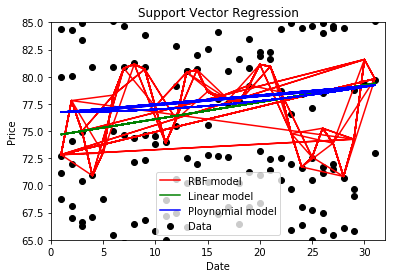

(74.252718305979215, 79.069565216992046, 78.909999085079065)


In [6]:
dates = []
prices = []

def get_data(filename):
    with open(filename, 'r') as csvfile:
        csvFileReader = csv.reader(csvfile)
        next (csvFileReader)
        for row in csvFileReader:
            dates.append(int(row[0].split('-')[0]))
            prices.append(float(row[1]))
    return

def predict_prices(dates, prices, x):
    dates = np.reshape(dates, (len(dates), 1))
    
    svr_lin = SVR(kernel= 'linear', C=1e3)
    svr_poly = SVR(kernel= 'poly', C=1e3, degree = 2)
    svr_rbf = SVR(kernel= 'rbf', C=1e3, gamma=0.1)
    svr_lin.fit(dates, prices)
    svr_poly.fit(dates, prices)
    svr_rbf.fit(dates, prices)
    
    plt.scatter(dates, prices, color='black', label='Data')
    plt.plot(dates, svr_rbf.predict(dates), color='red', label='RBF model')
    plt.plot(dates, svr_lin.predict(dates), color='green', label='Linear model')
    plt.plot(dates, svr_poly.predict(dates), color='blue', label='Ploynomial model')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Support Vector Regression')
    plt.legend()
    plt.axis([0, 32, 65, 85])
    plt.show()
    
    return svr_rbf.predict(x)[0], svr_lin.predict(x)[0], svr_poly.predict(x)[0]

get_data('anet.csv')

predicted_price = predict_prices(dates, prices, 29)

print(predicted_price)
